In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn # statistical graphs
import matplotlib.pyplot as plt # data visualization / graphs

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/keystroke-dynamics-benchmark-data-set/DSL-StrongPasswordData.csv


In [9]:
data = pd.read_csv("/kaggle/input/keystroke-dynamics-benchmark-data-set/DSL-StrongPasswordData.csv")
data.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,...,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,...,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,...,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,...,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,...,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


**Correlation**

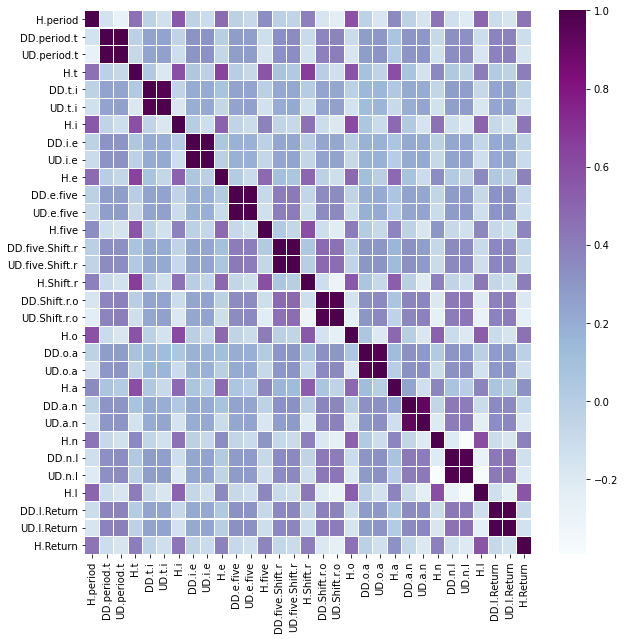

In [26]:
corrMatrix = data[['H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return']].corr()
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(corrMatrix, linewidths=0.1, cmap="BuPu")
plt.show()

In [27]:
data.columns

Index(['subject', 'sessionIndex', 'rep', 'H.period', 'DD.period.t',
       'UD.period.t', 'H.t', 'DD.t.i', 'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e',
       'H.e', 'DD.e.five', 'UD.e.five', 'H.five', 'DD.five.Shift.r',
       'UD.five.Shift.r', 'H.Shift.r', 'DD.Shift.r.o', 'UD.Shift.r.o', 'H.o',
       'DD.o.a', 'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l',
       'UD.n.l', 'H.l', 'DD.l.Return', 'UD.l.Return', 'H.Return'],
      dtype='object')

**Average Inter-Subject Variation**

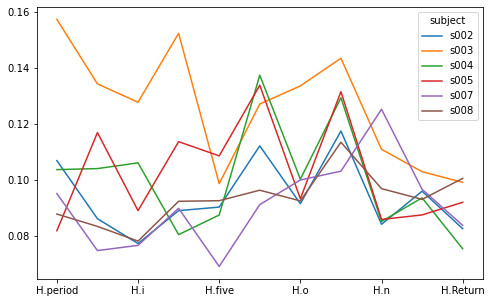

In [133]:
keyHoldLatency = data[['subject','H.period','H.t','H.i', 'H.e','H.five','H.Shift.r','H.o','H.a','H.n','H.l','H.Return']]
keyHoldLatency = keyHoldLatency.where((keyHoldLatency['subject']=='s002') | (keyHoldLatency['subject']=='s003') | (keyHoldLatency['subject']=='s004') | (keyHoldLatency['subject']=='s005') | (keyHoldLatency['subject']=='s007') | (keyHoldLatency['subject']=='s008'))
keyHoldLatency = keyHoldLatency.groupby('subject').agg('mean')
keyHoldLatency.T.plot(figsize=(8,5))

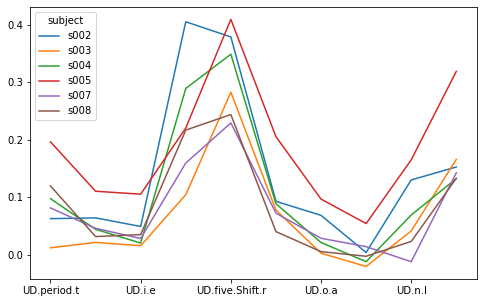

In [139]:
keyUDLatency = data[['subject','UD.period.t','UD.t.i','UD.i.e','UD.e.five','UD.five.Shift.r','UD.Shift.r.o','UD.o.a','UD.a.n','UD.n.l','UD.l.Return']]
keyUDLatency = keyUDLatency.where((keyUDLatency['subject']=='s002') | (keyUDLatency['subject']=='s003') | (keyUDLatency['subject']=='s004') | (keyUDLatency['subject']=='s005') | (keyUDLatency['subject']=='s007') | (keyUDLatency['subject']=='s008'))
keyUDLatency = keyUDLatency.groupby('subject').agg('mean')
keyUDLatency.T.plot(figsize=(8,5))

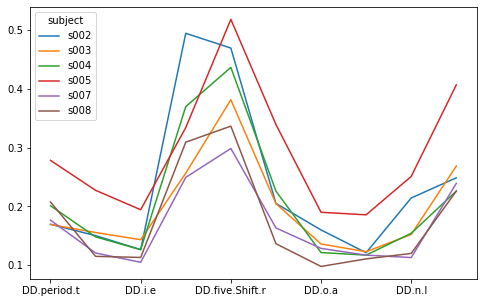

In [136]:
keyDDLatency = data[['subject','DD.period.t','DD.t.i','DD.i.e','DD.e.five','DD.five.Shift.r', 'DD.Shift.r.o','DD.o.a','DD.a.n', 'DD.n.l','DD.l.Return']]
keyDDLatency = keyDDLatency.where((keyDDLatency['subject']=='s002') | (keyDDLatency['subject']=='s003') | (keyDDLatency['subject']=='s004') | (keyDDLatency['subject']=='s005') | (keyDDLatency['subject']=='s007') | (keyDDLatency['subject']=='s008'))
keyDDLatency = keyDDLatency.groupby('subject').agg('mean')
keyDDLatency.T.plot(figsize=(8,5))

**Intra-Subject Variation**

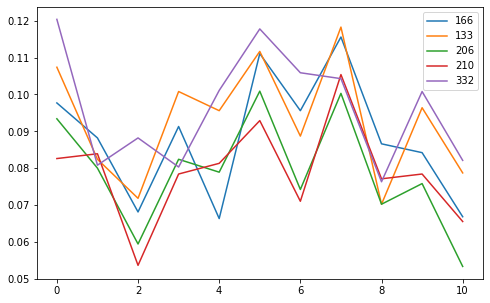

In [153]:
subKeyHoldLatency = data.where((data['subject']=='s004')).dropna().sample(n=5)
subKeyHoldLatency = subKeyHoldLatency[['H.period','H.t','H.i', 'H.e','H.five','H.Shift.r','H.o','H.a','H.n','H.l','H.Return']]
subKeyHoldLatency.T.plot(figsize=(8,5), use_index=False)